In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
%run rsi.ipynb
%run stoch.ipynb
%run bollinger_band.ipynb

data break down

In [2]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']
btc_low_price = btc_hist_data["Low"]
btc_high_price = btc_hist_data["High"]
btc_open_price = btc_hist_data["Open"]
btc_vol_price = btc_hist_data["Vol."]
btc_vol_price = btc_vol_price.str.replace('K','')
btc_chg_price = btc_hist_data["Change %"]


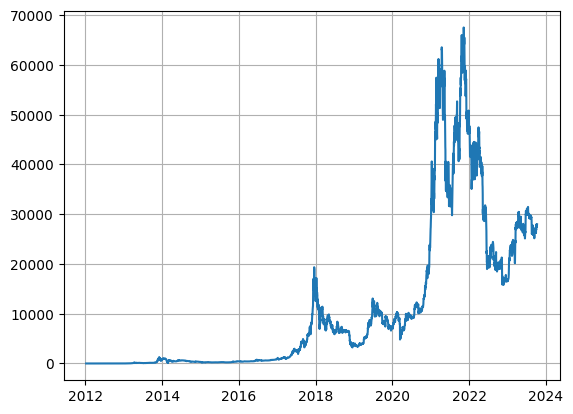

In [3]:
fig =plt.figure(1)
plt.plot(Date,btc_open_price.values)
plt.grid()
plt.show()

log of BTC  price

In [4]:
btc_close_price_np = btc_close_price.to_numpy()
btc_open_price_np = btc_open_price.to_numpy()
btc_low_price_np = btc_low_price.to_numpy()
btc_high_price_np = btc_high_price.to_numpy()

In [5]:
log_close_price =np.zeros(len(btc_close_price))
log_high_price =np.zeros(len(btc_close_price))
log_low_price =np.zeros(len(btc_close_price))
log_open_price =np.zeros(len(btc_close_price))

for i in range(len(btc_close_price)):
    log_close_price[i] = math.log10(btc_close_price_np[i])
    log_high_price[i] = math.log10(btc_high_price_np[i])
    log_low_price[i] = math.log10(btc_low_price_np[i])
    log_open_price[i] = math.log10(btc_open_price_np[i])
    



OHLC/4 of BTC price
HL/2 of BTC price
OC/2 of BTC price

In [6]:
ohlc = (log_close_price + log_high_price + log_low_price + log_open_price)/4
HL = (log_high_price + log_low_price)/2
OC = (log_close_price + log_open_price)/2

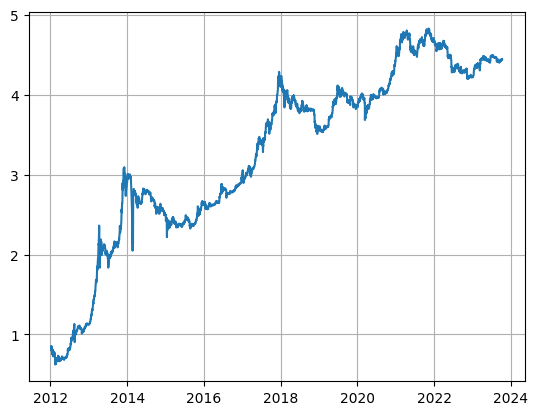

In [7]:
fig =plt.figure(2)
plt.plot(Date,log_close_price)

plt.grid()
plt.show()

Applynig RSI from rsi.ipynb

In [8]:
rsi_btc = rsi(btc_hist_data,14,True,21)

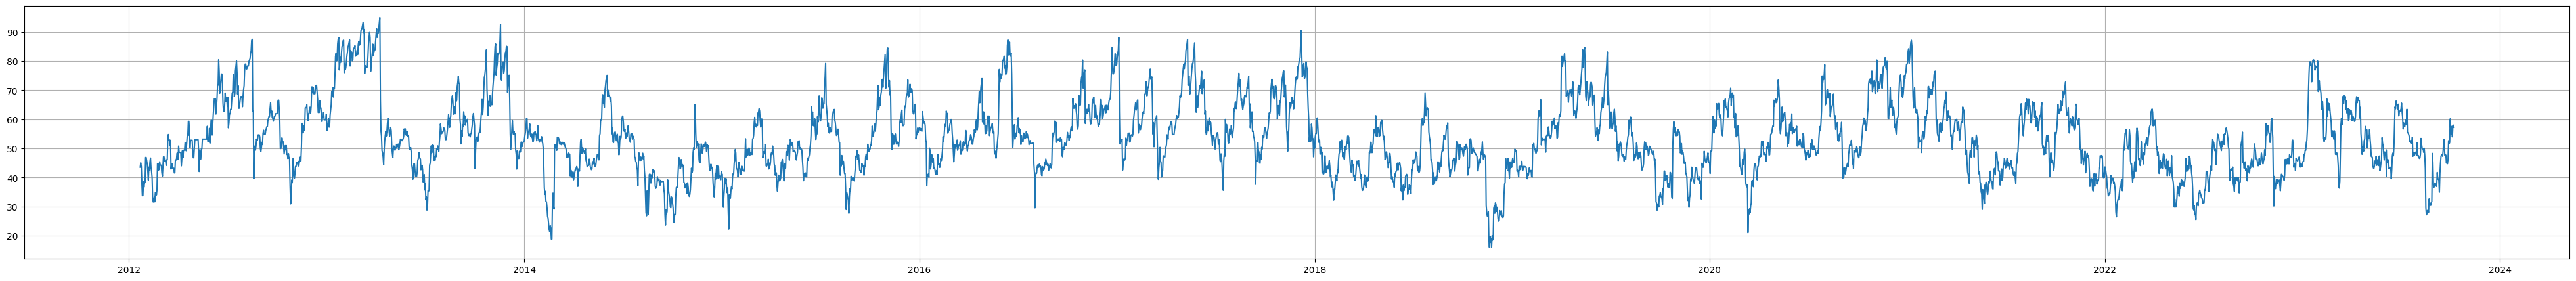

In [9]:
fig =  plt.figure(figsize=[50, 5])
plt.plot(Date,rsi_btc)

plt.grid()
plt.show()

Applying Stochastic on BTC close price

In [10]:
K , D = stochastic(btc_close_price,13 ,4,4)

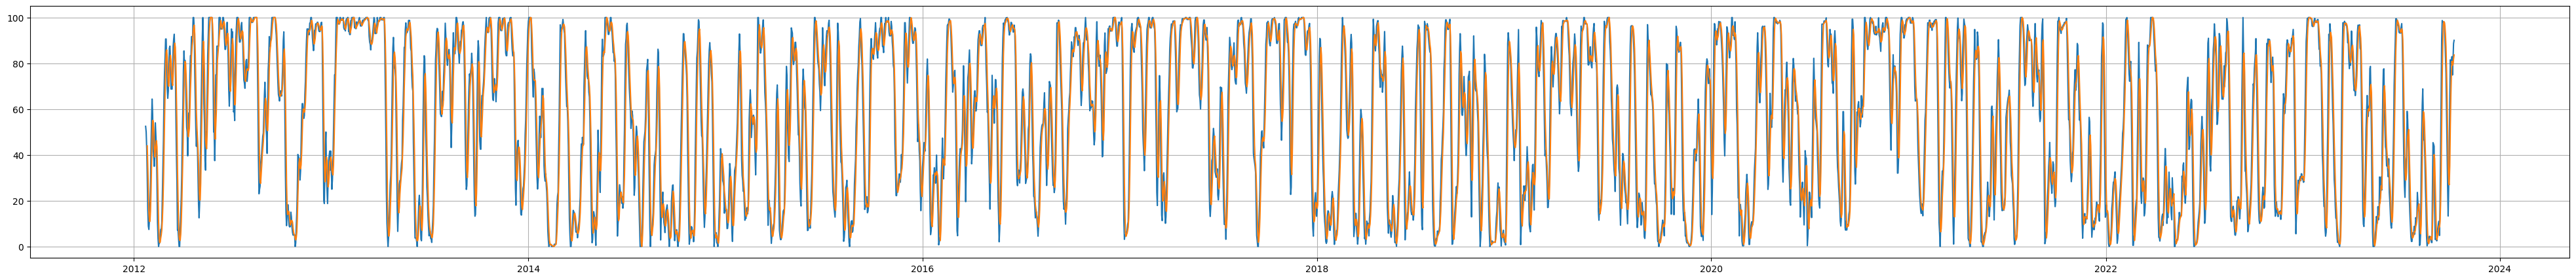

In [11]:
fig =  plt.figure(figsize=[50,5])
plt.plot(Date,K)
plt.plot(Date,D)

plt.grid()
plt.show()

Stochastic RSI

In [12]:
K_stoch_rsi , D_stoch_rsi = stochastic(rsi_btc,14,3,3)

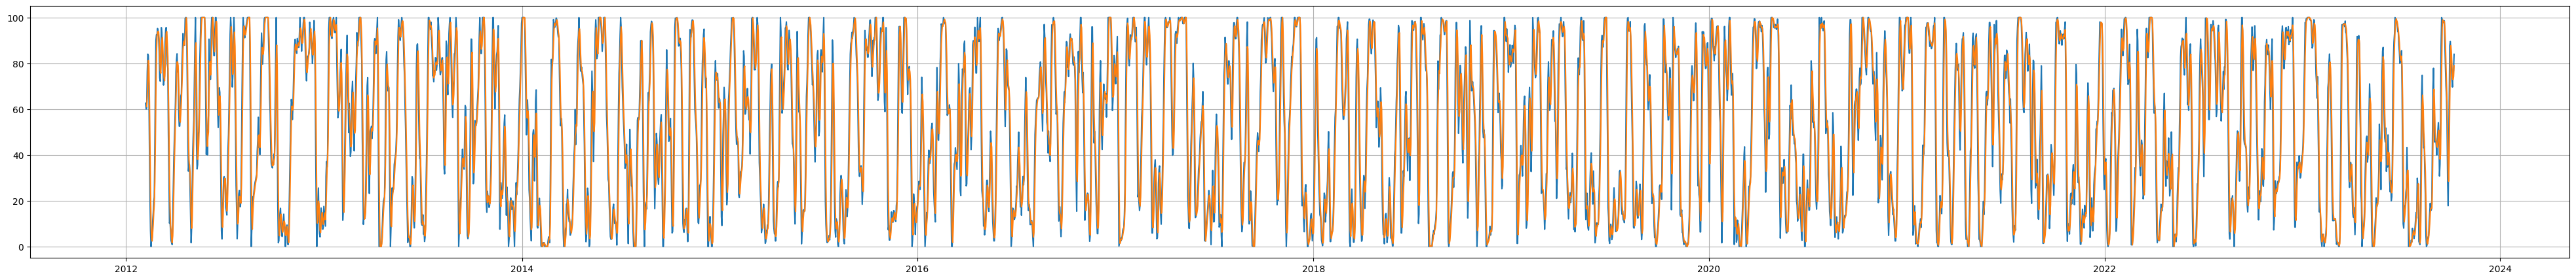

In [13]:
fig =  plt.figure(figsize=[50,5])
plt.plot(Date,K_stoch_rsi)
plt.plot(Date,D_stoch_rsi)

plt.grid()
plt.show()

Bollinger bands

In [20]:
sma_band , upper_band , lower_band  = bollinger_band(btc_close_price , std_mul=2.5)

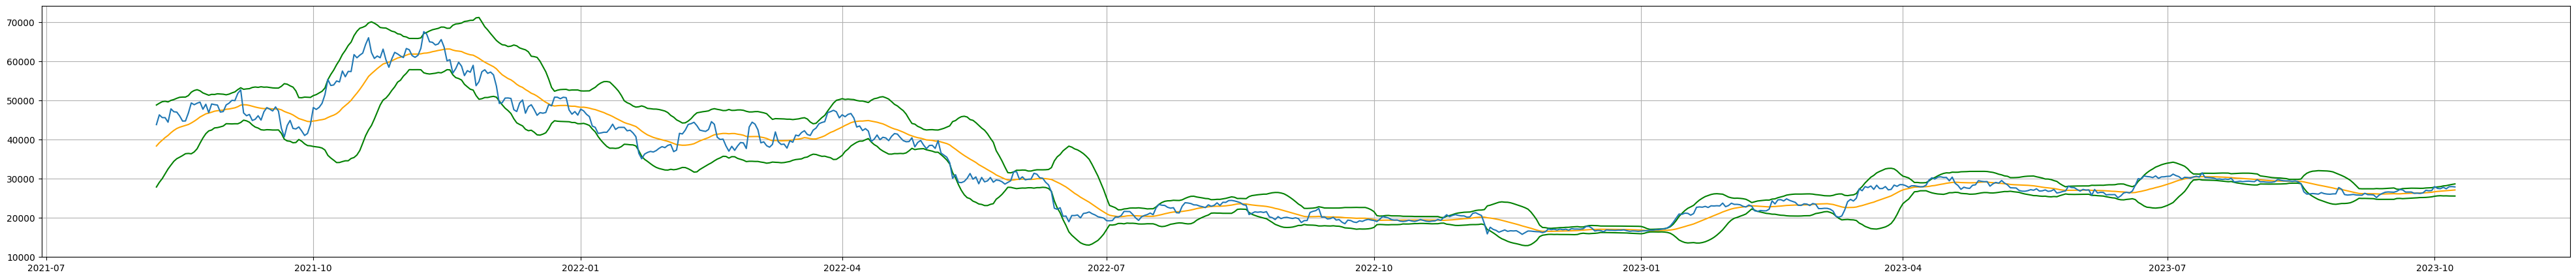

In [22]:
fig =  plt.figure(figsize=[50,5])
plt.plot(Date[3500::],sma_band[3500::],color = 'Orange')
plt.plot(Date[3500::],upper_band[3500::],color = 'Green')
plt.plot(Date[3500::],lower_band[3500::],color = 'Green')
plt.plot(Date[3500::],btc_close_price[3500::])

plt.grid()
plt.show()